# Import dependencies

In [1]:

import os, sys, pandas as pd, matplotlib.pyplot as plt, glob
from stumpy import config

# Import library with current code functions
sys.path.append(os.path.join("..", "lib"))
import manual_labeler_functions as man_lab_fun

import automatic_labeler_functions as aut_lab_fun

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

In [2]:
config.STUMPY_EXCL_ZONE_DENOM = 1 

SOURCE_FOLDER = os.path.join('..', 'Dataset')

LABELED_FILE_NAME = 'VD_LABELED_L0.CSV'
VD_MEASURE_FILE_NAME = 'VD_MEASURE_L0.CSV'

SOURCE_FOLDER_LOCAL = os.path.join(SOURCE_FOLDER, 'DD-Local')
FOLDER_PATH = os.path.join(SOURCE_FOLDER_LOCAL, '**', VD_MEASURE_FILE_NAME)
MAIN_LIST_MEASURE_local = sorted(glob.iglob(FOLDER_PATH, recursive=True ))


SOURCE_FOLDER_YT = os.path.join(SOURCE_FOLDER, 'YT-Online')
FOLDER_PATH = os.path.join(SOURCE_FOLDER_YT, '**', VD_MEASURE_FILE_NAME)
MAIN_LIST_MEASURE_YT = sorted(glob.iglob(FOLDER_PATH, recursive=True ))

MAIN_LIST_MEASURE = MAIN_LIST_MEASURE_local + MAIN_LIST_MEASURE_YT

SOURCE_FOLDER_REFS = os.path.join('..', 'Dataset', 'REF-Gold-Label')
FOLDER_PATH = os.path.join(SOURCE_FOLDER_REFS, '**', LABELED_FILE_NAME)
REFERENCE_LST = sorted(glob.iglob(FOLDER_PATH, recursive=True ))

## Select the time series

In [3]:
path_file = REFERENCE_LST[0]
path_dir = os.path.dirname(path_file)
vd_labeled_path = os.path.join(path_dir, LABELED_FILE_NAME)
vd_labeled = pd.read_csv(vd_labeled_path)
vd_labeled.drop(columns=['Unnamed: 0'], inplace=True)

## Select the measures in the interval

In [4]:
all_class = man_lab_fun.GET_ALL_CLASSES(vd_labeled)
label_name = all_class[0]

reference_measures = man_lab_fun.GET_MEASURES_FROM_CLASS(vd_labeled, label_name)

frames = man_lab_fun.GET_FRAMES_FROM_CLASS(vd_labeled, label_name)

all_measures_in_frame_interval = vd_labeled.loc[frames]
selected_measures_in_frame_interval = all_measures_in_frame_interval[reference_measures]

## Plot query serie

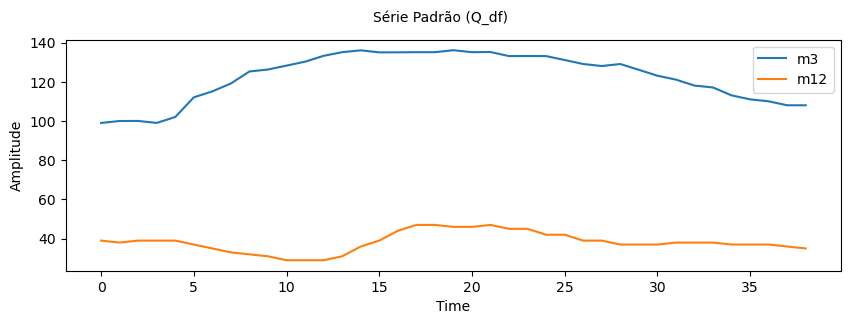

In [5]:
plt.subplots(figsize=(10, 3))
plt.suptitle('Série Padrão (Q_df)', fontsize='10')
plt.xlabel('Time', fontsize ='10')
plt.ylabel('Amplitude', fontsize='10')
plt.plot(selected_measures_in_frame_interval, label=selected_measures_in_frame_interval.columns)
plt.legend()
plt.show()

In [6]:
dict_label_parameters = {'label_name': label_name, 'reference_measures': reference_measures}

RESUME_DT = pd.DataFrame()
for i, current_path_location in enumerate(MAIN_LIST_MEASURE):
    print (str(i+1) + " of " + str(len(MAIN_LIST_MEASURE)) + ": " + current_path_location)

    RESUME_DT = aut_lab_fun.label_current_series(current_path_location, RESUME_DT, selected_measures_in_frame_interval, dict_label_parameters)

final_sum = RESUME_DT['final'].sum()
print(f'Total of saved Subseries == {final_sum}') 

1 of 44: ../Dataset/DD-Local/VD_D_0000000001/VD_MEASURE_L0.CSV
list_aux1 [925 1730 1215 1633 1279 218 1069 330 51 1352]
list_aux2 [1781 594 662 1562 1029 504 1426 74 1092 1255 338 0 983 1188 1356]
list_of_index [{1352, 330}]
VD_LABEL_PATH ../Dataset/DD-Local/VD_D_0000000001/VD_LABELED_L0.CSV
Creating Label File...
Saving VD_LABELED_L0...
2 of 44: ../Dataset/DD-Local/VD_D_0000000002/VD_MEASURE_L0.CSV
list_aux1 [1498 839 1001 579 1104 49 1406 1305]
list_aux2 [1255 1114 1517 0 79 433 814 153 1040 942 1460 634 1662 697 222]
list_of_index [{1104}]
VD_LABEL_PATH ../Dataset/DD-Local/VD_D_0000000002/VD_LABELED_L0.CSV
Creating Label File...
Saving VD_LABELED_L0...
3 of 44: ../Dataset/YT-Online/VD_Y_0000000001/VD_MEASURE_L0.CSV
list_aux1 [459 657 0 760 716 888 51 411]
list_aux2 [507 288 39 637 731 934 832 137 178]
list_of_index [set()]
VD_LABEL_PATH ../Dataset/YT-Online/VD_Y_0000000001/VD_LABELED_L0.CSV
Reading Label File...
Saving VD_LABELED_L0...
4 of 44: ../Dataset/YT-Online/VD_Y_0000000002/V